In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/Covid19

/content/gdrive/My Drive/Covid19


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_pickle('Data/data_cleaned.pkl')

In [170]:
df.head()

,user_id,status_id,text,created_at,verified,favourites_count,retweet_count
0,80943559,1244051645975191557,people storing staying home freezing things ta...,2020-03-29T00:00:00Z,False,604,0
1,27922157,1244051646935633921,spoke #covid19 stimulus package making way con...,2020-03-29T00:00:00Z,True,2894,3
2,1115874631,1244051645971025920,medical team aiding #wuhan fight epidemic comp...,2020-03-29T00:00:00Z,True,65,18
3,108845320,1244051647149543426,#coronavirus testing #covid19 #lgbt,2020-03-29T00:00:00Z,False,2658,1
4,17673635,1244051645102579712,#coronaupdate johns hopkins university said au...,2020-03-29T00:00:00Z,True,474,2


### 1 & 2: unique & non_unique token size

In [5]:
non_unique = {}
def func(sentence):
    for term in sentence:
        non_unique[term] = non_unique.get(term, 0) + 1

for ind in range(0,len(df),100000): # we split it because it gives RAM is full if we do all of them at once
    df['text'].iloc[ind:min(ind+100000,len(df))].str.split().apply(func)
    
len_unique = len(non_unique)
len_non_unique = sum(non_unique.values())
print(f'number of unique terms: {len_unique}')
print(f'number of non-unique terms: {len_non_unique}')

number of unique terms: 2391394
number of non-unique terms: 119085612


### 3 : Histogram

In [6]:
top_x = 20 # choose how many of the top tf you want to plot
top_tf = {}
terms, freqs = [], []
for term, freq in sorted(non_unique.items(), key=lambda item: item[1])[::-1]:
    if term[0] == '#':
        continue
    top_tf[term] = freq
    terms.append(term)
    freqs.append(freq)
    if len(top_tf) == top_x:
        break
print(top_tf)

{'people': 715478, 'cases': 570091, 'new': 537450, 'pandemic': 443780, 'help': 408713, 'covid19': 398670, 'time': 370293, 'coronavirus': 368427, 'health': 347594, 'like': 340111, 'deaths': 337285, 'home': 334747, 'need': 327348, 'world': 286678, 'support': 277389, 'today': 270923, 'stay': 270042, 'day': 244577, 'virus': 239958, 'crisis': 234799}


### 1) NAJAFI

In [ ]:
# you can use this to plot what you want:
print(top_tf, end='\n\n')  # Top 20 TF's, you can change the top_x = 20 to another value from the previous cell and re-run

{'people': 715478, 'cases': 570091, 'new': 537450, 'pandemic': 443780, 'help': 408713, 'covid19': 398670, 'just': 377619, 'time': 370293, 'coronavirus': 368427, 'health': 347594, 'like': 340111, 'deaths': 337285, 'home': 334747, 'need': 327348, 'world': 286678, 'support': 277389, 'today': 270923, 'stay': 270042, 'day': 244577, 'virus': 239958}



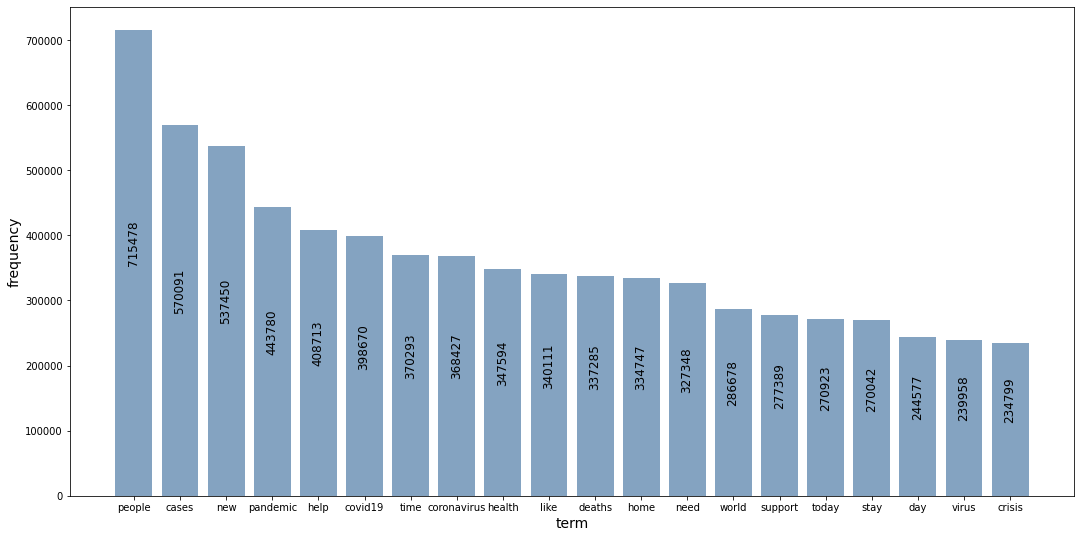

In [7]:
labels, values = zip(*top_tf.items())

labels = np.array(labels)
values = np.array(values)
indexes = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(18,9))
plt.bar(indexes, values,color=(0.2, 0.4, 0.6, 0.6))

# add labels
plt.xticks(indexes, labels)
plt.xlabel('term', fontsize=14)
plt.ylabel('frequency', fontsize=14)
for index, value in enumerate(values):
    ax.text(index-.15, value/2, value, fontsize=12,rotation=90)
plt.show()
fig.savefig('term_freq.pdf', bbox_inches='tight')

### (number of tweets) & (number of tweets by time)

In [8]:
n_dates = {}
def extract_day(date_time):
    date = date_time[:10] # extracting the date from 2020-04-09T19:00:00Z 
    n_dates[date] = n_dates.get(date, 0) + 1 # adding this date to our dict

df['created_at'].apply(extract_day)


0          None
1          None
2          None
3          None
4          None
           ... 
3306408    None
3306409    None
3306410    None
3306411    None
3306412    None
Name: created_at, Length: 8133785, dtype: object

### 2) NAJAFI

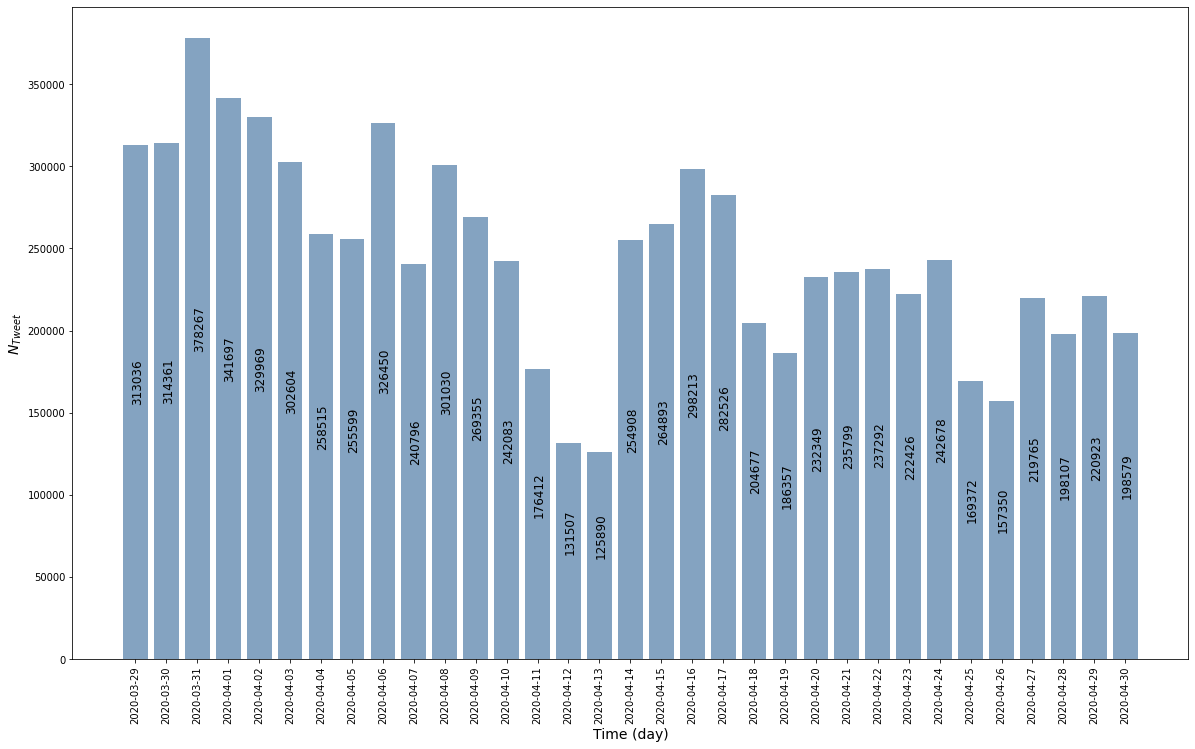

In [9]:
labels, values = zip(*n_dates.items())

labels = np.array(labels)
values = np.array(values)
indexes = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(20,12))
plt.bar(indexes, values,color=(0.2, 0.4, 0.6, 0.6))

# add labels
plt.xticks(indexes, labels,rotation=90)
plt.xlabel('Time (day)', fontsize=14)
plt.ylabel('$N_{Tweet}$', fontsize=14)
for index, value in enumerate(values):
    ax.text(index-.15, value/2, value, fontsize=12,rotation=90)
plt.show()
fig.savefig('N_Tweet.pdf', bbox_inches='tight')

### 6- TF of frequent tokens in time
6.1- dont count stopwords</br>
6.2- dont count the hashtags such as coronavirus

In [11]:
date2ind = {}  # for example: = {}
ind2date = {}  # for example: = {}
dates_all_tf = [] # it is a list of dictioneries
for ind, date in enumerate(n_dates.keys()):
    date2ind[date] = ind
    ind2date[ind] = date
    dates_all_tf.append({})

counter = 1
for index, row in df.iterrows():
    if index % 200000 == 1:
        print(f'progress: {round(counter/len(df)*100,2)} %')
    date = row['created_at'][:10] # extracting the date from 2020-04-09T19:00:00Z
    for term in row['text'].split():
        if term[0]=='#':
            continue
        dates_all_tf[date2ind[date]][term] = dates_all_tf[date2ind[date]].get(term, 0) + 1 # adding this date to our dict
    counter+=1

progress: 0.0 %
progress: 2.46 %
progress: 4.92 %
progress: 7.38 %
progress: 9.84 %
progress: 12.29 %
progress: 14.75 %
progress: 17.21 %
progress: 19.67 %
progress: 22.13 %
progress: 24.59 %
progress: 27.05 %
progress: 29.51 %
progress: 31.97 %
progress: 34.42 %
progress: 36.88 %
progress: 39.34 %
progress: 41.8 %
progress: 44.26 %
progress: 46.72 %
progress: 49.18 %
progress: 51.64 %
progress: 54.1 %
progress: 56.55 %
progress: 59.01 %
progress: 59.35 %
progress: 61.81 %
progress: 64.27 %
progress: 66.73 %
progress: 69.19 %
progress: 71.64 %
progress: 74.1 %
progress: 76.56 %
progress: 79.02 %
progress: 81.48 %
progress: 83.94 %
progress: 86.4 %
progress: 88.86 %
progress: 91.32 %
progress: 93.77 %
progress: 96.23 %
progress: 98.69 %


In [ ]:
print(date2ind)
print(ind2date)
print(dates_all_tf[0]['cases'])

{'2020-03-29': 0, '2020-03-30': 1, '2020-03-31': 2, '2020-04-01': 3, '2020-04-02': 4, '2020-04-03': 5, '2020-04-04': 6, '2020-04-05': 7, '2020-04-06': 8, '2020-04-07': 9, '2020-04-08': 10, '2020-04-09': 11, '2020-04-10': 12, '2020-04-11': 13, '2020-04-12': 14, '2020-04-13': 15, '2020-04-14': 16, '2020-04-15': 17, '2020-04-16': 18, '2020-04-17': 19, '2020-04-18': 20, '2020-04-19': 21, '2020-04-20': 22, '2020-04-21': 23, '2020-04-22': 24, '2020-04-23': 25, '2020-04-24': 26, '2020-04-25': 27, '2020-04-26': 28, '2020-04-27': 29, '2020-04-28': 30, '2020-04-29': 31, '2020-04-30': 32}
{0: '2020-03-29', 1: '2020-03-30', 2: '2020-03-31', 3: '2020-04-01', 4: '2020-04-02', 5: '2020-04-03', 6: '2020-04-04', 7: '2020-04-05', 8: '2020-04-06', 9: '2020-04-07', 10: '2020-04-08', 11: '2020-04-09', 12: '2020-04-10', 13: '2020-04-11', 14: '2020-04-12', 15: '2020-04-13', 16: '2020-04-14', 17: '2020-04-15', 18: '2020-04-16', 19: '2020-04-17', 20: '2020-04-18', 21: '2020-04-19', 22: '2020-04-20', 23: '2020-

In [12]:
token_days = [] # a list of list ([term][day])
for term in top_tf.keys():
    days_tf = []
    for day in range(len(date2ind)):
        if term in dates_all_tf[day]:
            count = dates_all_tf[day][term]
            days_tf.append(count)
        else:
            days_tf.append(0)
    token_days.append(days_tf)

termlist_date2freq = []
for ind, term in enumerate(top_tf.keys()):
    date2freq = {}
    for day in range(len(date2ind)):
        date2freq[ind2date[day]] = token_days[ind][day]
    termlist_date2freq.append(date2freq)

### 3) NAJAFI

0.10552042305459225


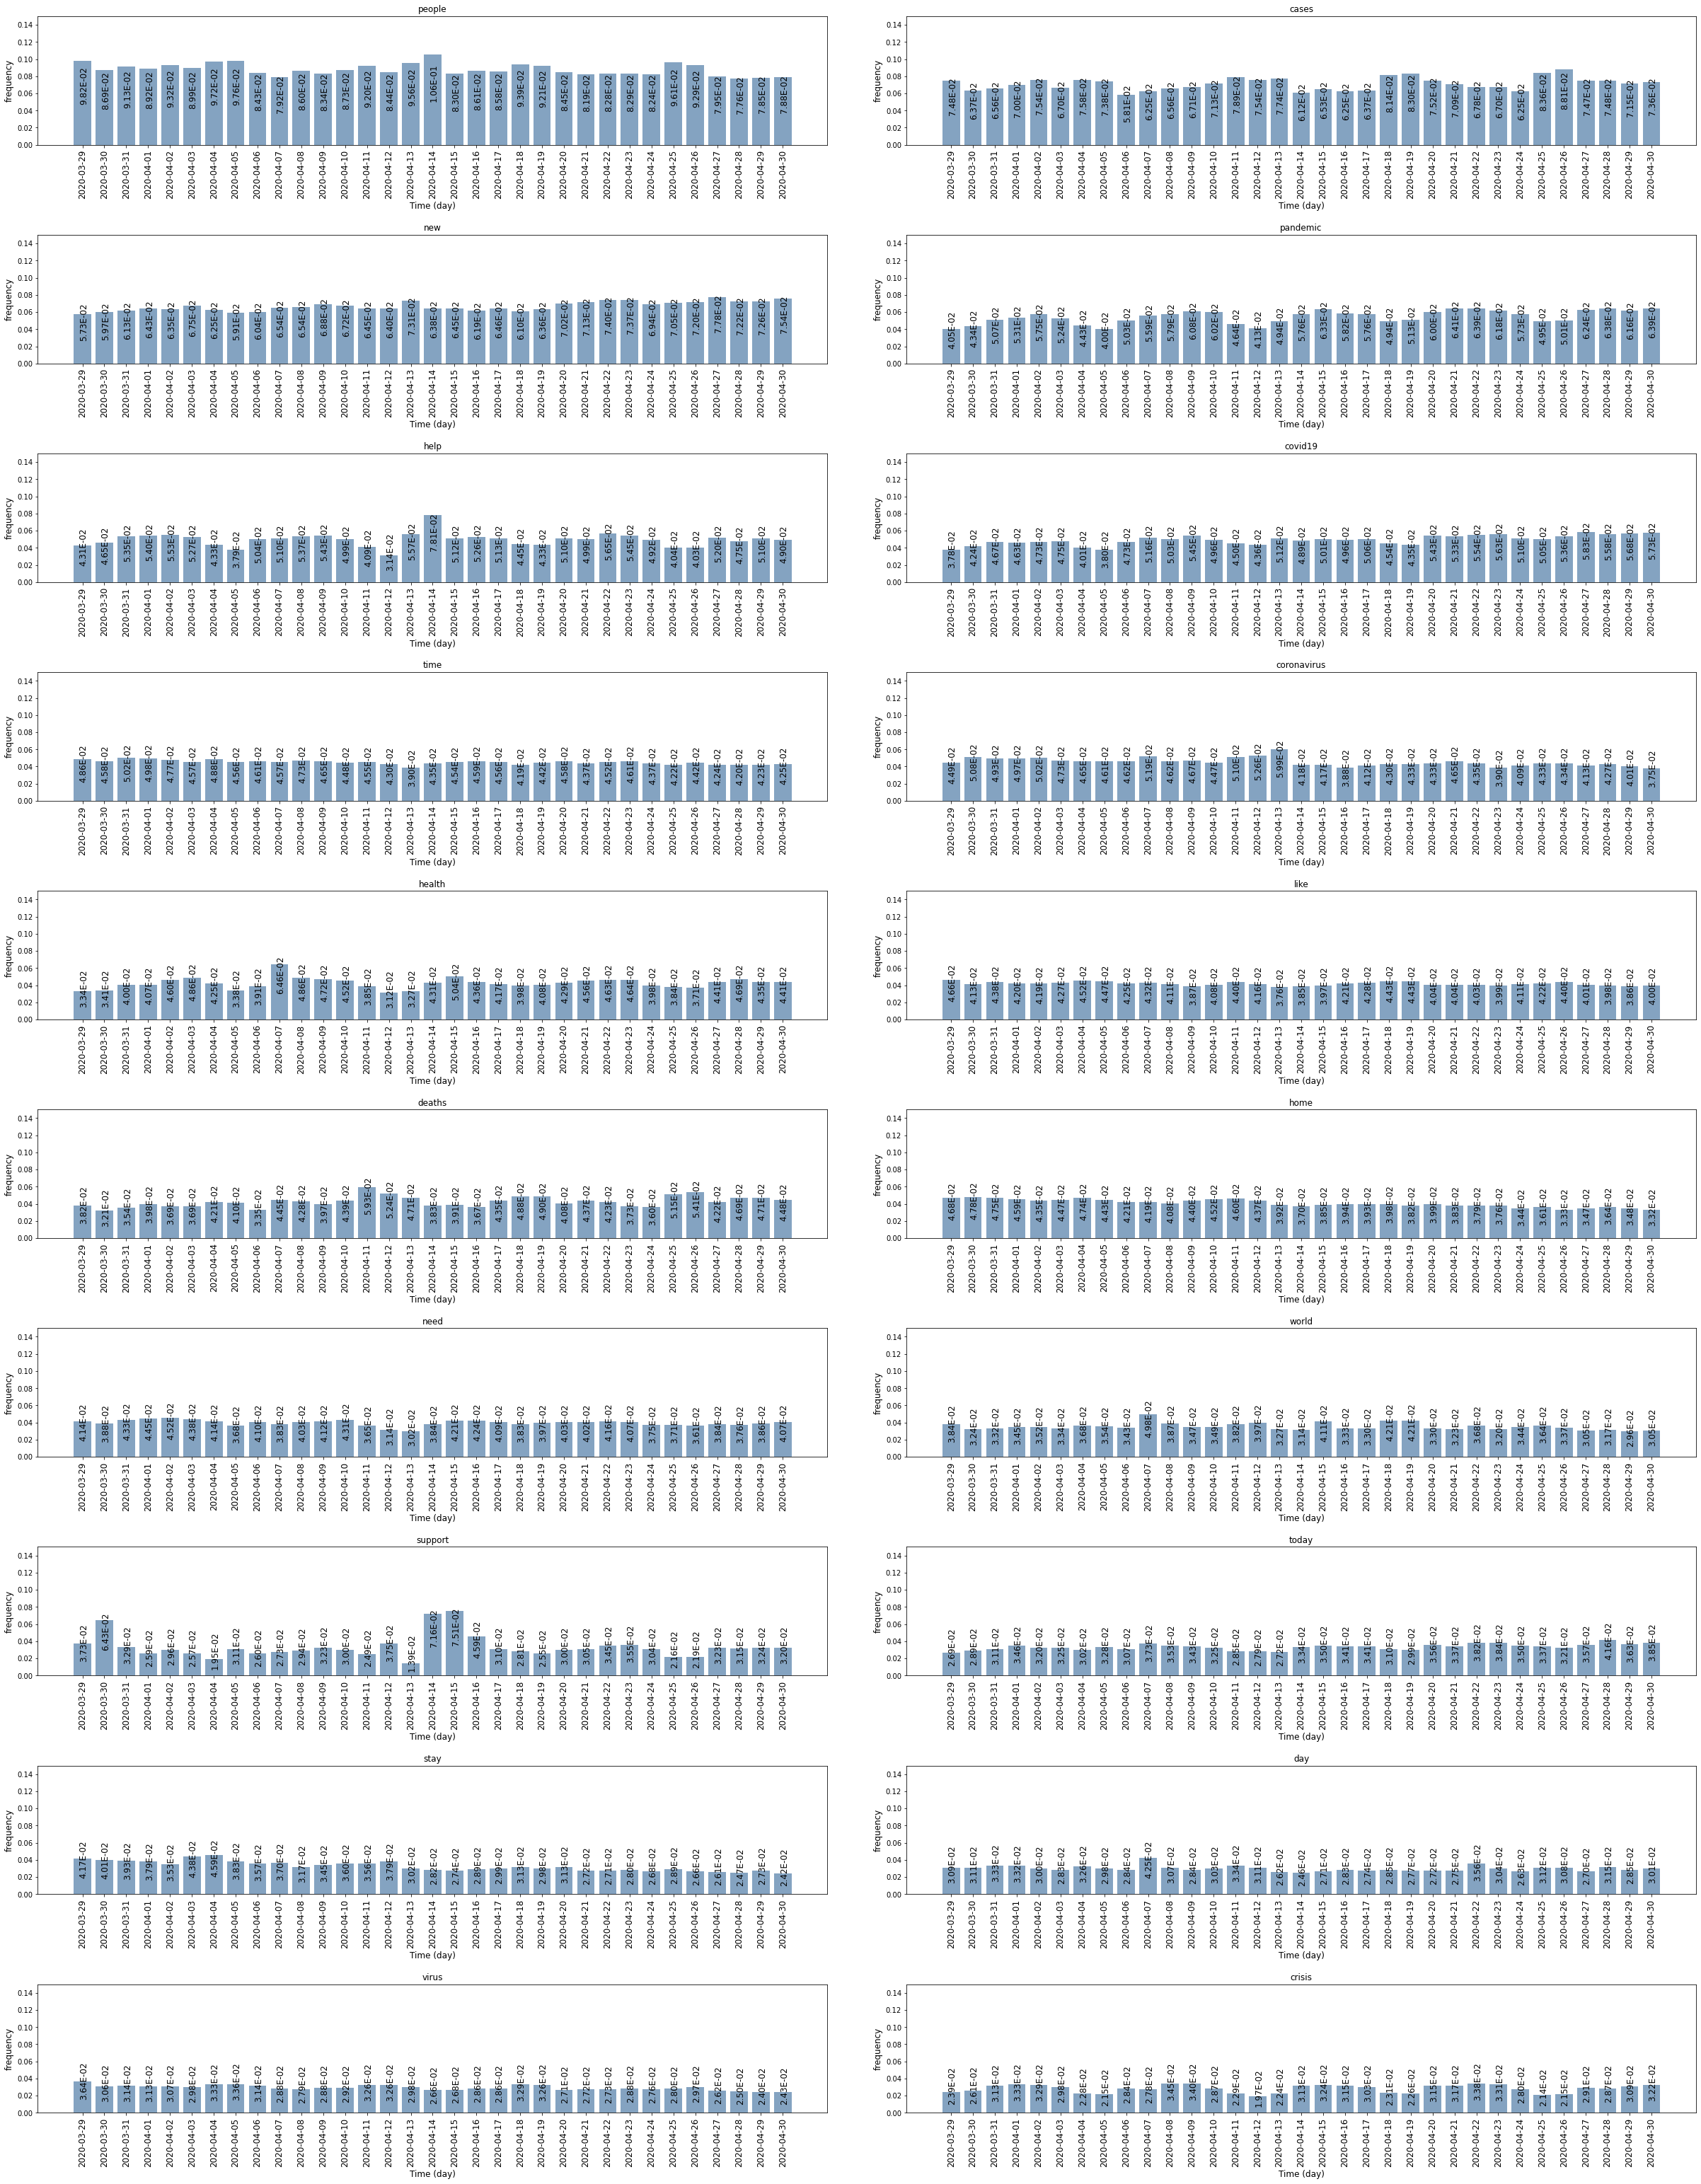

In [13]:
_ , total_tweets_day = zip(*n_dates.items())
fig = plt.figure(figsize=(42,42))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.7, wspace=0.1)
counter=1
keys = list(top_tf.keys())
max_val = -float('inf')
for i in range(10):
    for j in range(2):
        axes = plt.subplot(10, 2, counter)
        labels, values = zip(*termlist_date2freq[counter-1].items())
        labels = np.array(labels)
        values = np.array(values) / np.array(total_tweets_day)
        max_ = values.max()
        if max_ > max_val:
            max_val = max_
        indexes = np.arange(len(labels))
        plt.bar(indexes, values,color=(0.2, 0.4, 0.6, 0.6))
        axes.set_ylim(0, 0.15)
        plt.title(keys[counter-1])
        plt.xticks(indexes, labels,rotation=90,fontsize=12)
        plt.xlabel('Time (day)', fontsize=12)
        plt.ylabel('frequency', fontsize=12)
        for index, value in enumerate(values):
            axes.text(index-.15, value/2, f"{value:.2E}", fontsize=12,rotation=90)


        counter+=1

### 7- Pie Plot of most frequent tokens

## 4) NAJAFI

In [14]:
top_terms2percent = {}

sum_ = 0
for term, freq in top_tf.items():
    sum_ += freq
for term, freq in top_tf.items():
    top_terms2percent[term] = freq/sum_*100

print(top_terms2percent)

{'people': 9.768480574325132, 'cases': 7.7834997848956755, 'new': 7.337849500153802, 'pandemic': 6.058965208257986, 'help': 5.580192543969413, 'covid19': 5.44307463061925, 'time': 5.055641092121038, 'coronavirus': 5.030164439097897, 'health': 4.74572975933847, 'like': 4.643563738667429, 'deaths': 4.604980125889617, 'home': 4.570328601038208, 'need': 4.4693094393457, 'world': 3.9140385505723163, 'support': 3.787215061862802, 'today': 3.6989342266818652, 'stay': 3.6869058604903393, 'day': 3.3392300999146274, 'virus': 3.2761665091783536, 'crisis': 3.2057302535800773}


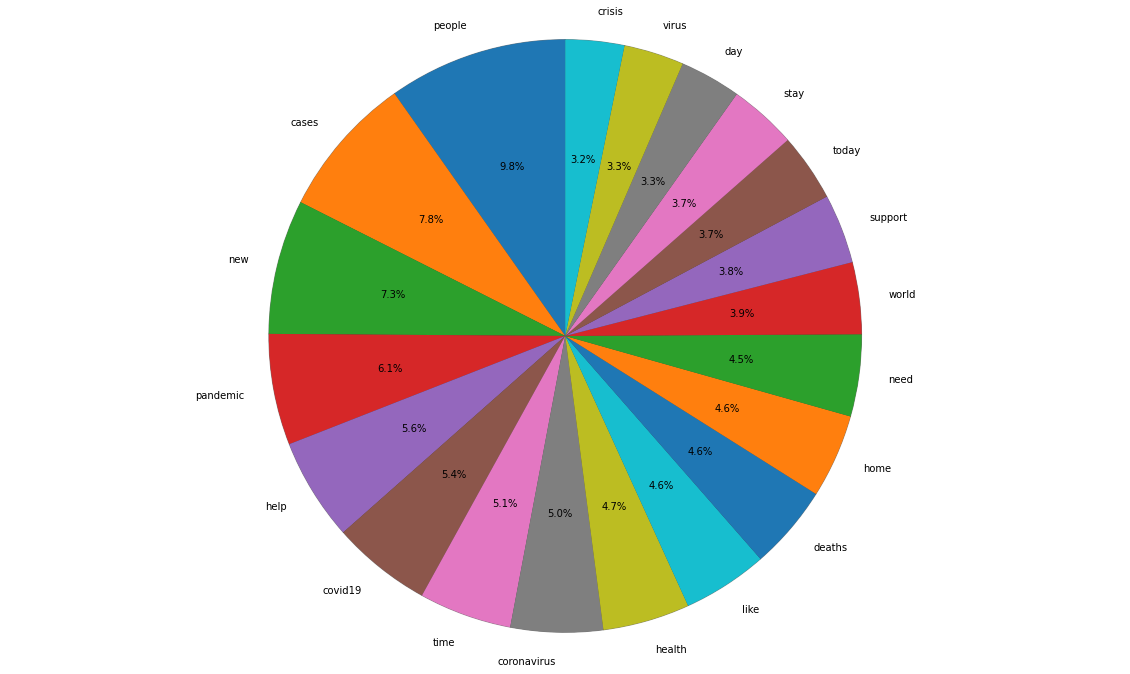

In [15]:
labels, sizes = zip(*top_terms2percent.items())

explode = [0 for x in range(len(labels))]  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(20,12))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,radius=500)
ax1.axis('equal') 

plt.show()

tuple